# Programa em python para detecção de árvores em uma imagem proveninet de VANT

## Metodologia aplicada:
### -Binarização da imagem por threshold;
### -Transformações morfológicas para redução do ruído (erosão e dilatação)
### -Utilização de um método para encontrar contornos
### -Classificação dos contornos conforme tamanho
### ---Áreas pequenas são consideradas como ruído
### ---Áreas grandes são consideradas com mais de uma árvore (uma relação entre (área total)/(area por árvore) é levada em conta


In [196]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
%matplotlib inline

Img shape (1923, 1768, 3)


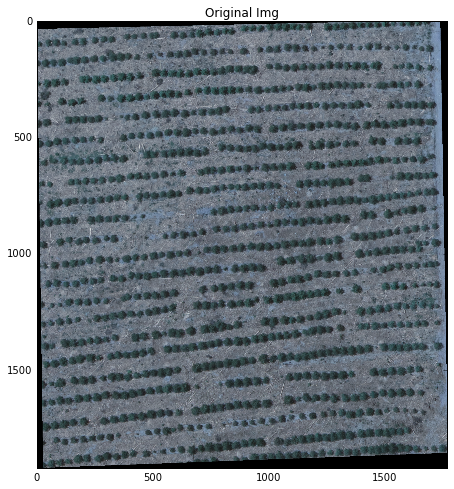

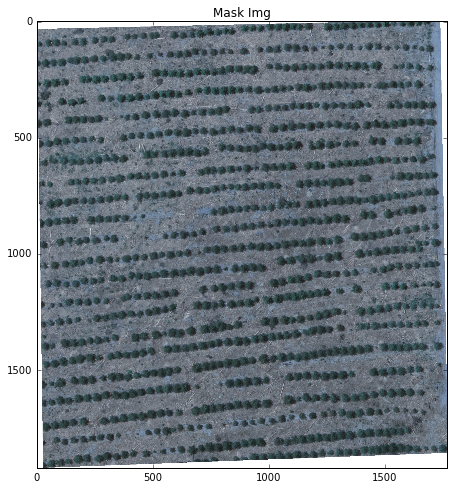

In [137]:
# Loads the Georeferenced TIF img
img_original = cv2.imread('Desafio.tif',cv2.IMREAD_LOAD_GDAL)
#prints the Img shape, as we can see, the file is 1923x1768 with 3 channels
print "Img shape", img_original.shape
#Plots the Image to see if everything is fine
plt.figure(figsize=(8,8))
plt.imshow(img_original)
plt.title("Original Img")
plt.show()

##change the black border to white
for i in range(img_original.shape[0]):
    for j in range(img_original.shape[1]):
        if np.array_equal(np.array(img_original[i,j]),np.array([0,0,0])):
            img_original[i,j] = [255,255,255]
plt.figure(figsize=(8,8))
plt.imshow(img_original)
plt.title("Original image with White Borders")
plt.show()

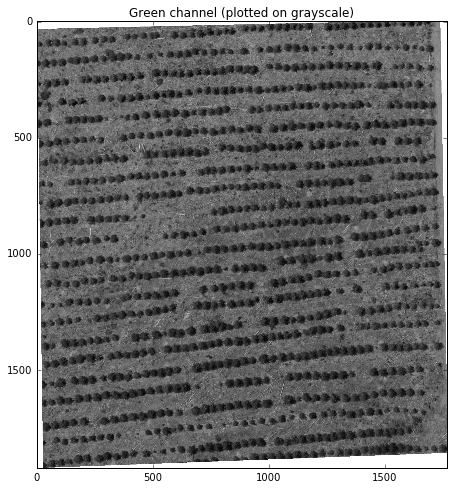

In [138]:
## Lets extract the second channel information (GREEN CHANNEL) and plot it as a gray img
imgCH2 = img_original[:,:,1]
plt.figure(figsize=(8,8))
plt.imshow(imgCH2,cmap='gray')
plt.title("Green channel (plotted on grayscale)")
plt.show()

## As we can see, the histogram equalization resulted on a higher contrast

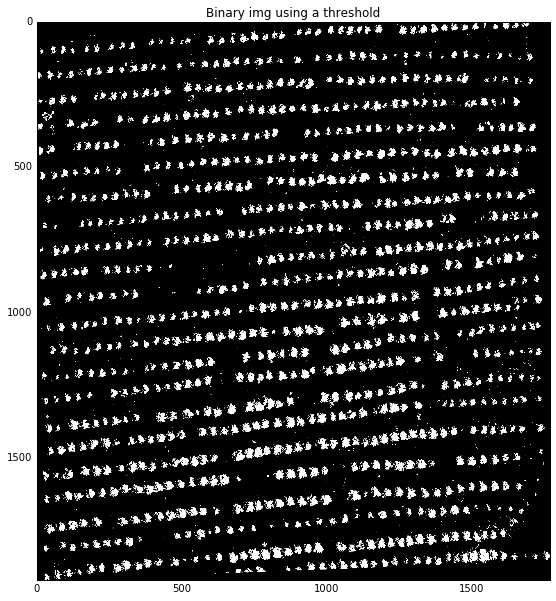

In [238]:
## Now, applying a threshold to the image
ret,binary = cv2.threshold(imgCH2,65,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize=(10,10))
plt.imshow(binary,cmap='gray')
plt.title("Binary img using a threshold")
plt.show()

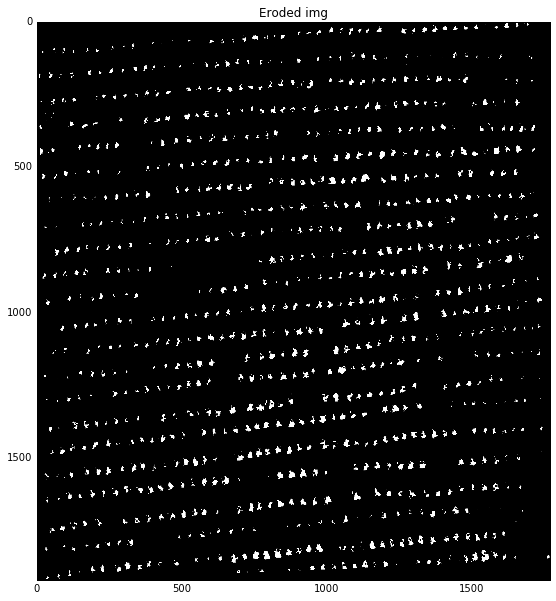

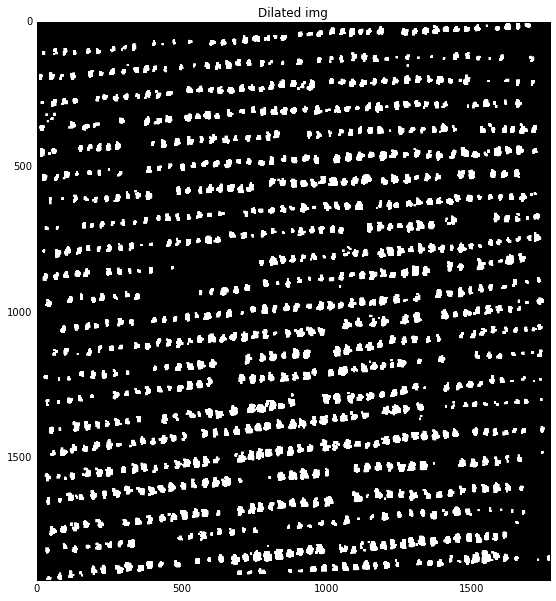

In [240]:
## Now testing some morphological operations
kernel = np.ones((2,2),np.uint8)

eroded = cv2.erode(binary,kernel,iterations = 4)
plt.figure(figsize=(10,10))
plt.imshow(eroded,cmap='gray')
plt.title("Eroded img")
plt.show()
dilated = cv2.dilate(eroded,kernel,iterations = 7)
plt.figure(figsize=(10,10))
plt.imshow(dilated,cmap='gray')
plt.title("Dilated img")
plt.show()

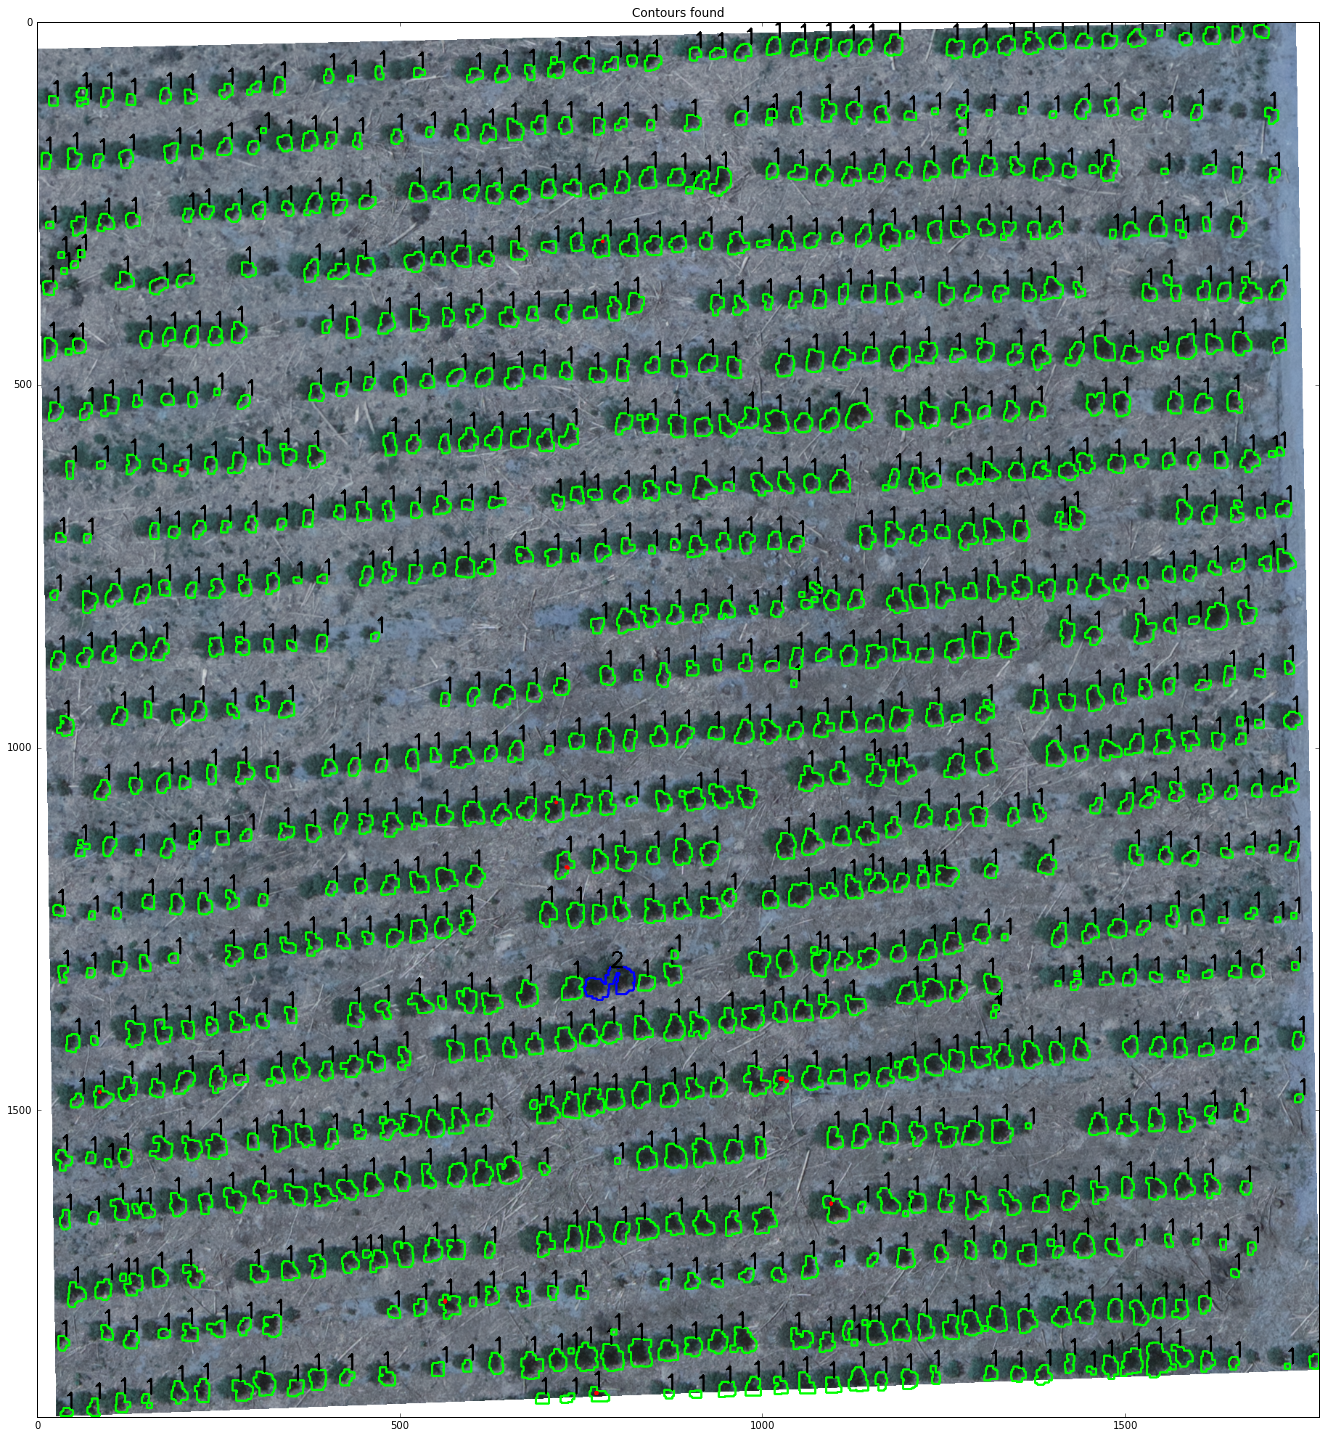

True

In [247]:
## Now to find the contours of the image

img_contours, contours, hierarchy = cv2.findContours(dilated,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# Make a copy of the original image
img_copy = np.copy(img_original)

# Tree counter
cont_Trees = 0

# Size THRESHOLDS found through testing
AREA_THRESHOLD_BIG = 1700
AREA_THRESHOLD_SMALL = 35


## Apply a simple comparsion to see where each contour fits
## If the contour is too big, a ratio is calculated to find the number of trees within.
for i in range(len(contours)):
    area = cv2.contourArea(contours[i])
    if area > AREA_THRESHOLD_BIG:
        cv2.drawContours(img_copy, contours, i, (0,0,255), 2)
        
        num_trees = int(math.ceil(area/(AREA_THRESHOLD_BIG*0.75)))
        cv2.putText(img_copy,str(num_trees), (contours[i][0][0][0],contours[i][0][0][1]), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0),2)
        cont_Trees+=num_trees
    elif area <AREA_THRESHOLD_SMALL:
        cv2.drawContours(img_copy, contours, i, (255,0,0), 2)
    else:
        cv2.drawContours(img_copy, contours, i, (0,255,0), 2)
        cv2.putText(img_copy,"1", (contours[i][0][0][0],contours[i][0][0][1]), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0),2)
        cont_Trees+=1
        
#Plots the image        
plt.figure(figsize=(25,25))
plt.imshow(img_copy)
plt.title("Contours found")
plt.show()

In [249]:
print "QUANTIDADE ENCONTRADA DE OBJETOS: ", cont_Trees

QUANTIDADE ENCONTRADA DE OBJETOS:  964


## FORAM ENCONTRADAS 964 ÁRVORES NA IMAGEM 